# House Price Dataset

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv('./real-index_csv.csv')
print(df)

             date                    country   price
0      1966-03-31  Emerging market economies     NaN
1      1966-03-31         Advanced economies     NaN
2      1966-03-31       United Arab Emirates     NaN
3      1966-03-31                    Austria     NaN
4      1966-03-31                  Australia     NaN
...           ...                        ...     ...
12622  2017-09-30                   Thailand  115.55
12623  2017-09-30                     Turkey  139.83
12624  2017-09-30              United States     NaN
12625  2017-09-30                  Euro area     NaN
12626  2017-09-30               South Africa   97.83

[12627 rows x 3 columns]


In [11]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12627 entries, 0 to 12626
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     12627 non-null  object 
 1   country  12627 non-null  object 
 2   price    4561 non-null   float64
dtypes: float64(1), object(2)
memory usage: 296.1+ KB
None
             price
count  4561.000000
mean     90.835694
std      26.251676
min      21.870000
25%      76.350000
50%      94.700000
75%     103.520000
max     218.090000


In [12]:
print(df.isnull().sum())

date          0
country       0
price      8066
dtype: int64


In [13]:
df = df.drop_duplicates()
df["price"] = df["price"].fillna(df["price"].mean())
average_price = df.groupby("country")["price"].mean()

Text(0.5, 1.0, 'House price distribution')

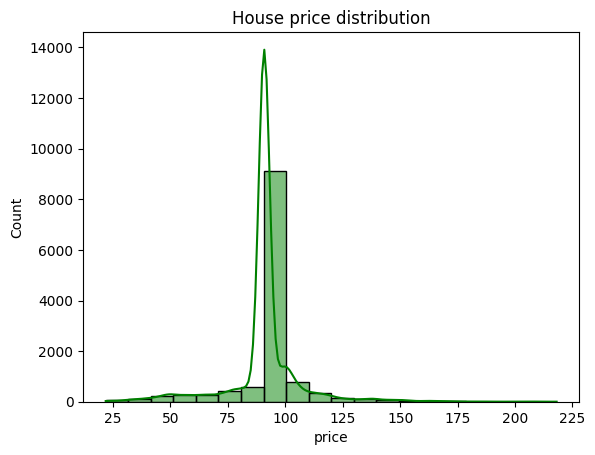

In [14]:
sns.histplot(df["price"], kde=True, bins=20, color="green")
plt.title("House price distribution")

Text(0.5, 1.0, 'Price Distribution by Country')

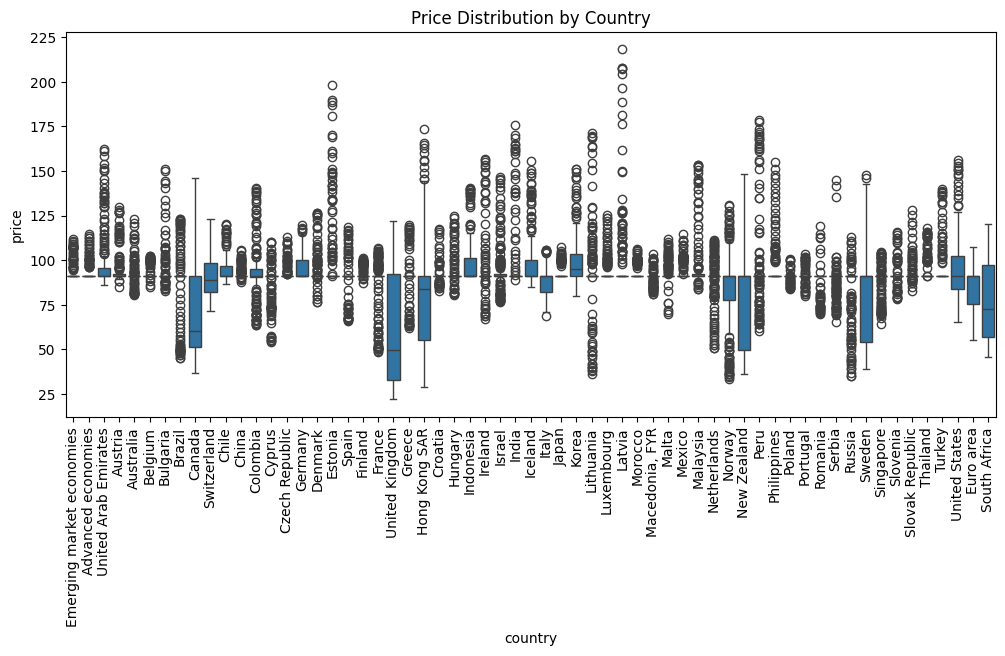

In [15]:
plt.figure(figsize=(12, 5))
sns.boxplot(x="country", y="price", data=df)
plt.xticks(rotation=90)
plt.title("Price Distribution by Country")

Text(0.5, 1.0, 'Average price over years')

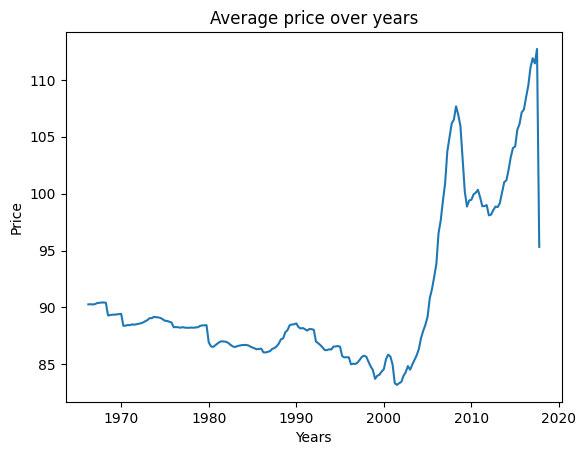

In [16]:
df["date"] = pd.to_datetime(df["date"])
daily_avg = df.groupby("date")["price"].mean()
plt.plot(daily_avg)
plt.xlabel("Years")
plt.ylabel("Price")
plt.title("Average price over years")